#### Running the EMIT model for FCR estimation to compare its performance with our vehicle-specific metamodels
#### Ehsan Moradi, Ph.D. Candidate

In [119]:
# Load required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing

In [112]:
# General settings
pd.options.mode.chained_assignment = None
EXPERIMENTS = (
    '019 Hyundai Elantra GT 2019 (2.0L Auto)',
    # '025 Chevrolet Captiva 2010 (2.4L Auto)',
    # '027 Chevrolet Cruze 2011 (1.8L Manual)',
)
SENSOR = 'Vepeak'   # '3DATX parSync Plus' is the alternative
FEATURES = ['SPD_KH', 'ACC_MS2', 'ALT_M']
DEPENDENT = 'FCR_LH'

In [113]:
# Load sample data from Excel to a pandas dataframe
def load_from_Excel(vehicle, sensor, order, sheet):
    directory = (
        '../../../Google Drive/My Drive/Academia/PhD/Field Experiments/'
        + sensor +
        '/'
        + vehicle
        + '/Processed/NONE/'
    )
    input_file = vehicle + ' - NONE - {}.xlsx'.format(order)
    input_path = directory + input_file
    df = pd.read_excel(input_path, sheet_name=sheet, header=0)
    return df

In [114]:
# Save the predicted field back to Excel file
def save_to_excel(df, vehicle, sensor):
    directory = (
        '../../../Google Drive/My Drive/Academia/PhD/Field Experiments/'
        + sensor
        + '/'
        + vehicle
        + '/Processed/ARIMA/'
    )
    output_file = vehicle + ' - ARIMA - COMPARE.xlsx'
    output_path = directory + output_file
    with pd.ExcelWriter(output_path, engine='openpyxl', mode='w') as writer:
        df.to_excel(writer, header=True, index=None)
    print('{} -> Data is saved to Excel successfully!'.format(vehicle))
    return None

In [144]:
# Batch execution on all vehicles and their trips
for vehicle in EXPERIMENTS:
    df = load_from_Excel(vehicle, 'Veepeak', '10', 'Sheet1')
    # Apply feature scaling
    scaler = preprocessing.StandardScaler().fit(df[FEATURES + [DEPENDENT]])
    df[FEATURES + [DEPENDENT]] = scaler.transform(df[FEATURES + [DEPENDENT]])
    # Train-Test splitting (70%-30%)
    split_point = int(.7 * len(df))
    train, test = df[:split_point], df[split_point:]
    # Train the ARIMA model
    model = ARIMA(train[DEPENDENT], exog=train[FEATURES], order=(1, 0, 2))
    model_fit = model.fit()
    # save_to_excel(df, vehicle)

In [145]:
# Out-of-sample validation
predict = model_fit.predict(start=0, end=len(test) - 1, exogen=test[FEATURES])
len(predict)

4331

In [146]:
test[DEPENDENT][:10]
len(test)

4331

<AxesSubplot:ylabel='predicted_mean'>

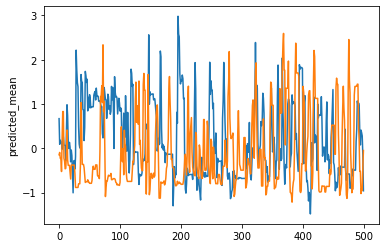

In [148]:
sns.lineplot(x=range(500), y=predict[750:1250])
sns.lineplot(x=range(500), y=test[DEPENDENT][750:1250])